# Predicting sentiment from product reviews

# Fire up Libraries

Josemar Figueiredo Pereira

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Read some product review data

## Loading reviews for a set of baby products. 

In [2]:
products = pd.read_csv('amazon_baby.csv')

# Let's explore this data together

## Data includes the product name, the review text and the rating of the review. 

## Given that we have some lines with empty registers, we drop them

In [3]:
products.shape

(183531, 3)

In [4]:
products.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [5]:
products.isnull().sum()

name      318
review    829
rating      0
dtype: int64

In [6]:
products = products.dropna(axis=0)  # axis = 0 means we drop lines

In [7]:
products.isnull().sum()

name      0
review    0
rating    0
dtype: int64

In [8]:
products.shape # we lost a few examples

(182384, 3)

# Examining the reviews for most-sold product:  'Vulli Sophie the Giraffe Teether'

In [9]:
c = Counter(products['name'].values)

In [10]:
print('Most common:')
for name, count in c.most_common(10):
    print('%s: %7d' % (name, count))

Most common:
Vulli Sophie the Giraffe Teether:     779
Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L:     560
Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision:     558
Baby Einstein Take Along Tunes:     545
Cloud b Twilight Constellation Night Light, Turtle:     517
Fisher-Price Booster Seat, Blue/Green/Gray:     487
Fisher-Price Rainforest Jumperoo:     446
Graco Nautilus 3-in-1 Car Seat, Matrix:     418
Leachco Snoogle Total Body Pillow:     388
Regalo Easy Step Walk Thru Gate, White:     372


# What this Sophie the Giraffe?

# <img src="sophie.jpg">

In [11]:
giraffe_reviews = products[products['name'] == 'Vulli Sophie the Giraffe Teether']

In [12]:
len(giraffe_reviews)

779

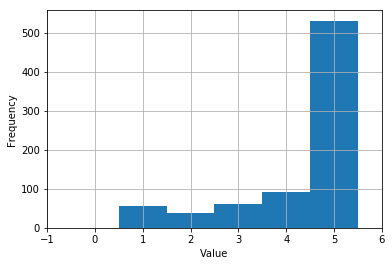

In [13]:
plt.hist(giraffe_reviews['rating'], bins=np.arange(10)-0.5)
plt.xlabel("Value")
plt.xlim([-1, 6])
plt.ylabel("Frequency")
plt.grid('on')
plt.show()

# Build a sentiment classifier

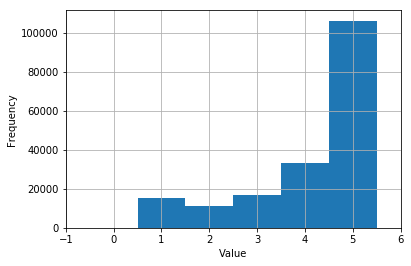

In [14]:
plt.hist(products['rating'], bins=np.arange(10)-0.5)
plt.xlabel("Value")
plt.xlim([-1, 6])
plt.ylabel("Frequency")
plt.grid('on')
plt.show()

## Define what's a positive and a negative sentiment

We will ignore all reviews with rating = 3, since they tend to have a neutral sentiment.  Reviews with a rating of 4 or higher will be considered positive, while the ones with rating of 2 or lower will have a negative sentiment.   

In [15]:
#ignore all 3* reviews
products = products[products['rating'] != 3]

In [16]:
#positive sentiment = 4* or 5* reviews
products['sentiment'] = products['rating'] >=4

In [17]:
products.head()

,name,review,rating,sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,True
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,True
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,True
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,True
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,True


## Let's train the sentiment classifier

In [18]:
train_data = products.sample(frac=0.8, random_state=200)
test_data  = products.drop(train_data.index)
print(train_data.shape, test_data.shape)

(132543, 4) (33136, 4)


# Build the word count vector for each review

In [19]:
count_vectorizer = CountVectorizer()
x_train = count_vectorizer.fit_transform(train_data['review'].values)

# Build the y vector

In [20]:
y_train = train_data['sentiment'].values

# Training the classifier

In [21]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Evaluate the sentiment model

In [22]:
x_test = count_vectorizer.transform(test_data['review'].values)
y_test = test_data['sentiment'].values

# predict class labels for the test set
predicted = classifier.predict(x_test)

In [23]:
predicted

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [24]:
# generate class probabilities
probs = classifier.predict_proba(x_test)
print(probs)

[[  3.21966209e-01   6.78033791e-01]
 [  1.37940682e-05   9.99986206e-01]
 [  8.17860999e-08   9.99999918e-01]
 ..., 
 [  1.76748476e-03   9.98232515e-01]
 [  2.00366018e-02   9.79963398e-01]
 [  1.07334219e-02   9.89266578e-01]]


In [25]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.931645340415
0.957903036391


# Applying the learned model to understand sentiment for Giraffe

In [534]:
sophie_probs = classifier.predict_proba(count_vectorizer.transform(giraffe_reviews['review']))

In [535]:
sophie_probs.shape

(779, 2)

In [536]:
giraffe_reviews['predicted_sentiment'] = sophie_probs.max(axis=1)

In [537]:
giraffe_reviews.head()

,name,review,rating,predicted_sentiment
34313,Vulli Sophie the Giraffe Teether,He likes chewing on all the parts especially t...,5,0.998442
34314,Vulli Sophie the Giraffe Teether,My son loves this toy and fits great in the di...,5,0.999308
34315,Vulli Sophie the Giraffe Teether,There really should be a large warning on the ...,1,0.694459
34316,Vulli Sophie the Giraffe Teether,All the moms in my moms' group got Sophie for ...,5,0.950915
34317,Vulli Sophie the Giraffe Teether,I was a little skeptical on whether Sophie was...,5,0.660668


## Sort the reviews based on the predicted sentiment and explore

In [538]:
giraffe_reviews = giraffe_reviews.sort_values('predicted_sentiment', ascending=False)

## Most positive reviews for the giraffe

In [539]:
giraffe_reviews.head()

,name,review,rating,predicted_sentiment
34892,Vulli Sophie the Giraffe Teether,"Sophie, oh Sophie, your time has come. My gran...",5,1.0
34434,Vulli Sophie the Giraffe Teether,My Mom-in-Law bought Sophie for my son when he...,5,1.0
34515,Vulli Sophie the Giraffe Teether,"As every mom knows, you always want to give yo...",5,1.0
34341,Vulli Sophie the Giraffe Teether,I'll be honest...I bought this toy because all...,4,1.0
34442,Vulli Sophie the Giraffe Teether,"Yes, it's imported. Yes, it's expensive. And y...",5,1.0


In [540]:
print(giraffe_reviews[giraffe_reviews.index==34892]['review'].values)

[ "Sophie, oh Sophie, your time has come. My granddaughter, Violet is 5 months old and starting to teeth. What joy little Sophie brings to Violet. Sophie is made of a very pliable rubber that is sturdy but not tough. It is quite easy for Violet to twist Sophie into unheard of positions to get Sophie into her mouth. The little nose and hooves fit perfectly into small mouths, and the drooling has purpose. The paint on Sophie is food quality.Sophie was born in 1961 in France. The maker had wondered why there was nothing available for babies and made Sophie from the finest rubber, phthalate-free on St Sophie's Day, thus the name was born. Since that time millions of Sophie's populate the world. She is soft and for babies little hands easy to grasp. Violet especially loves the bumpy head and horns of Sophie. Sophie has a long neck that easy to grasp and twist. She has lovely, sizable spots that attract Violet's attention. Sophie has happy little squeaks that bring squeals of delight from Vi

In [541]:
print(giraffe_reviews[giraffe_reviews.index==34434]['review'].values)

[ 'My Mom-in-Law bought Sophie for my son when he was just starting to really chew on things (and we were hearing some pretty scary things about toys not made in the USA). She did some research and came across Sophie and we are so glad that she did! While Sophie doesn\'t come from the USA, we love the fact that she is 100% safe and natural, and my son loves to play with her. I also love how soft Sophie is, my son tends to swing his toys around and when he\'s sitting on my lap I\'m usually in danger of being hit in the face with whatever he\'s holding, needless to say a soft toy is even better in my book! There\'s one last thing I want to comment on, I\'ve read reviews that said that Sophie was a "glorified dog toy" or something to that effect, and I don\'t want to seem rude, but I think they\'re crazy! Yes Sophie does squeak, (which my son didn\'t care about much at first but now he loves) but that\'s about as far as the comparison could go! If you want a quality teething toy for your 

## Show most negative reviews for giraffe

In [542]:
giraffe_reviews.tail()

,name,review,rating,predicted_sentiment
35072,Vulli Sophie the Giraffe Teether,I recently ordered this as a gift and compared...,2,0.518154
34985,Vulli Sophie the Giraffe Teether,"Going by the Amazon reviews, there was too muc...",2,0.513343
34960,Vulli Sophie the Giraffe Teether,My 5-month old played with Sophie off and on f...,4,0.511836
34677,Vulli Sophie the Giraffe Teether,My baby enjoys this toy but the LOUD squeak ha...,2,0.510115
34576,Vulli Sophie the Giraffe Teether,"I thought it was made from a special material,...",2,0.503884


In [543]:
print(giraffe_reviews[giraffe_reviews.index==34576]['review'].values)

[ 'I thought it was made from a special material, but the product is very simple, a mere plastic that can be found everywhere. it is too expensive.']


In [544]:
print(giraffe_reviews[giraffe_reviews.index==35072]['review'].values)

[ "I recently ordered this as a gift and compared the this one to the one my son has and wow u can tell it's fake. The serial number is hard to read and the rubber is way harder than the authentic ones and it's has a funny smells!! So not the original vulli Sophia"]


# Quizz questions

## Answer 1

In [63]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']

In [132]:
import re

def word_counter(words, line):
    return dict([(word, len([m.start() for m in re.finditer(word, line)])) for word in words])

In [133]:
x = word_counter(['tes', 'awe'], 'test aweso test awesome' )
print(x)

{'tes': 2, 'awe': 2}


In [149]:
def awesome_counter(line, word="awesome"):
    return line[word] if word in line else 0

In [150]:
y = awesome_counter(x)
print(y)

1


In [140]:
cols = products.shape[1]
try:
    products.insert(cols, 'awesome', 0)
except ValueError:
    print("The column already exists.")

The column already exists.


In [151]:
#del products["awesome"]


In [155]:
products.head()

,name,review,rating,sentiment,word_count,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,True,"{'awesome': 0, 'great': 0, 'fantastic': 0, 'am...",0,0,0,0,1,0,0,0,0,0,0
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,True,"{'awesome': 0, 'great': 0, 'fantastic': 0, 'am...",0,0,0,0,0,0,0,0,0,0,0
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,True,"{'awesome': 0, 'great': 0, 'fantastic': 0, 'am...",0,0,0,0,3,0,0,0,0,0,0
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,True,"{'awesome': 0, 'great': 1, 'fantastic': 0, 'am...",0,1,0,0,0,0,0,0,0,0,0
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,True,"{'awesome': 0, 'great': 1, 'fantastic': 0, 'am...",0,1,0,0,0,0,0,0,0,0,0


In [152]:
products["awesome"] = products['word_count'].apply(awesome_counter)  # Apply is useful when the column value is the only argument that you need.

Another way is to use the function word_count, wich supports arguments.

In [43]:
products.shape[1]

4

In [154]:
for word in selected_words:
    products[word] = products['word_count'].apply(lambda x: awesome_counter(x, word))

In [159]:
word_count = dict([(word, sum(products[word])) for word in selected_words])
word_count

{'amazing': 2432,
 'awesome': 3201,
 'awful': 627,
 'bad': 4318,
 'fantastic': 1513,
 'great': 47453,
 'hate': 3375,
 'horrible': 957,
 'love': 62081,
 'terrible': 999,
 'wow': 117}

In [160]:
most_used_word = ""
most_used = 0
least_used_word = ""
least_used = 10**9

for x in selected_words:
    if word_count[x] > most_used:
        most_used_word = x
        most_used = word_count[x]
        
    if word_count[x] <= least_used:
        least_used_word = x
        least_used = word_count[x]   



In [556]:
print("Most used word: {0}, ocurrences: {1}".format(most_used_word, most_used))
print("Least used word: {0}, ocurrences: {1}".format(least_used_word, least_used))

Most used word: love, ocurrences: 62081
Least used word: wow, ocurrences: 117


## Answer 2

### Selecting desired columns

In [583]:
del products["beta zero"]

In [580]:
del train_data["beta zero"]

In [572]:
# del test_data["beta zero"]

In [161]:
products.head()

,name,review,rating,sentiment,word_count,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,True,"{'awesome': 0, 'great': 0, 'fantastic': 0, 'am...",0,0,0,0,1,0,0,0,0,0,0
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,True,"{'awesome': 0, 'great': 0, 'fantastic': 0, 'am...",0,0,0,0,0,0,0,0,0,0,0
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,True,"{'awesome': 0, 'great': 0, 'fantastic': 0, 'am...",0,0,0,0,3,0,0,0,0,0,0
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,True,"{'awesome': 0, 'great': 1, 'fantastic': 0, 'am...",0,1,0,0,0,0,0,0,0,0,0
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,True,"{'awesome': 0, 'great': 1, 'fantastic': 0, 'am...",0,1,0,0,0,0,0,0,0,0,0


In [167]:
products.insert(0, 'beta zero', 1)

ValueError: cannot insert beta zero, already exists

In [169]:
cols = [x + sufix for x in selected_words] + ["sentiment"]
selected_words.append("beta zero")
train_data = products[cols].sample(frac=0.8, random_state=200)
test_data  = products[cols].drop(train_data.index)
print(train_data.shape, test_data.shape)

TypeError: insert() takes exactly 2 arguments (1 given)

In [168]:
train_data.head()

,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate,beta zero,beta zero,sentiment
101947,0,0,0,0,0,0,0,0,0,0,0,1,1,True
123877,0,1,0,0,0,0,0,0,0,0,0,1,1,True
152842,0,0,0,0,0,0,0,0,0,0,0,1,1,True
7571,0,1,0,0,1,0,0,0,0,0,0,1,1,True
150359,0,0,0,0,0,0,0,0,0,0,0,1,1,True


### Separe features and expected result

In [598]:
features = selected_words
x_train_selected_words = train_data[features].values
y_train_selected_words = train_data["sentiment"].values

### Training the classifier

In [600]:
selected_words_model = LogisticRegression()
selected_words_model.fit(x_train_selected_words, y_train_selected_words)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Evaluate the sentiment model

In [480]:
x_test_selected_words = test_data[features].values
y_test_selected_words = test_data['sentiment'].values

# predict class labels for the test set
predicted_selected_words = selected_words_model.predict(x_test_selected_words)
predicted_selected_words

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [481]:
# generate class probabilities
probs_selected_words = selected_words_model.predict_proba(x_test_selected_words)
print(probs_selected_words)
print(probs_selected_words.shape)

[[ 0.07586499  0.92413501]
 [ 0.11306949  0.88693051]
 [ 0.02421863  0.97578137]
 ..., 
 [ 0.07586499  0.92413501]
 [ 0.05647425  0.94352575]
 [ 0.21354476  0.78645524]]
(33136, 2)


In [482]:
word_count_coef = dict(zip(selected_words, selected_words_model.decision_function(x_train_selected_words)))
word_count_coef

{'amazing': 3.2559776398563516,
 'awesome': 1.3036893313556284,
 'awful': 2.0597640589350625,
 'bad': 3.2559776398563516,
 'beta zero': 1.3036893313556284,
 'fantastic': 1.3036893313556284,
 'great': 2.0597640589350625,
 'hate': 1.3036893313556284,
 'horrible': 1.3036893313556284,
 'love': 1.3036893313556284,
 'terrible': 1.3036893313556284,
 'wow': 1.3036893313556284}

## Answer 3

Remember the first model accuaracy

In [483]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.931645340415
0.957903036391


Now the new model accuaracy

In [484]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test_selected_words, predicted_selected_words))
print(metrics.roc_auc_score(y_test_selected_words, probs_selected_words[:, 1]))

0.842799372284
0.69361315766


Stays clear that the first model is better. Well, this makes sense once there is a lot of more information, to predict the costumer sentiment. So, it´s fine.

## Answer 4

### Baby Trend Diaper Champ

# <img src="trashcan.jpg" alt="Trash can" style="width: 200px;">

In [31]:
diaper_champ_reviews = products[products['name'] == 'Baby Trend Diaper Champ'].copy()
print(diaper_champ_reviews.shape[0])
diaper_champ_reviews.head()

298


,name,review,rating,sentiment
312,Baby Trend Diaper Champ,Ok - newsflash. Diapers are just smelly. We'...,4,True
314,Baby Trend Diaper Champ,"My husband and I selected the Diaper ""Champ"" m...",1,False
315,Baby Trend Diaper Champ,Excellent diaper disposal unit. I used it in ...,5,True
316,Baby Trend Diaper Champ,We love our diaper champ. It is very easy to ...,5,True
317,Baby Trend Diaper Champ,Two girlfriends and two family members put me ...,5,True


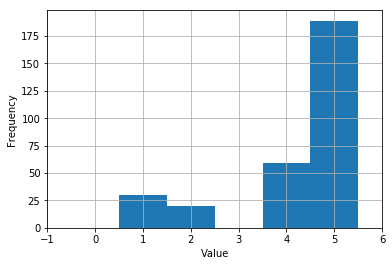

In [32]:
plt.hist(diaper_champ_reviews['rating'], bins=np.arange(10)-0.5)
plt.xlabel("Value")
plt.xlim([-1, 6])
plt.ylabel("Frequency")
plt.grid('on')
plt.show()

### Applying the learned model to understand sentiment for Trash can

In [33]:
diaper_champ_probs = classifier.predict_proba(count_vectorizer.transform(diaper_champ_reviews['review']))

In [34]:
diaper_champ_probs.shape

(298, 2)

In [35]:
diaper_champ_reviews['predicted_sentiment'] = diaper_champ_probs.max(axis=1)

In [36]:
diaper_champ_reviews = diaper_champ_reviews.sort_values('predicted_sentiment', ascending=False)

In [37]:
diaper_champ_reviews.head()

,name,review,rating,sentiment,predicted_sentiment
376,Baby Trend Diaper Champ,"This is absolutely, by far, the best diaper pa...",5,True,1.000000
320,Baby Trend Diaper Champ,I originally put this item on my baby registry...,5,True,1.000000
451,Baby Trend Diaper Champ,"As a first time mother, I wanted to get the be...",5,True,0.999999
377,Baby Trend Diaper Champ,"At only 3 weeks old, my son goes through about...",5,True,0.999999
328,Baby Trend Diaper Champ,Diaper Champ or Diaper Genie? That was my dile...,5,True,0.999998


In [38]:
print(diaper_champ_reviews[diaper_champ_reviews.index==376]['review'].values)

[ "This is absolutely, by far, the best diaper pail money can buy.  Never do we detect a diaper odor (and my husband has a very sensitive sense of smell and is usually very quick to complain about such things).  For those who say they have a problem with the Diaper Champ getting stuck...the ONLY time this ever happens to us is when the bag is full and needs to be changed.  We love that it uses regular kitchen trash bags, makes it much more economical.  We have not found that we need to worry about frequent emptying or cleaning.  We just leave the Champ to do its job until the mechanism begins to feel like it's getting stuck...then we change the bag.  For us this means about once a week.  Not only is the Champ EASY to use, it's kind of fun.  Before our daughter was born we really worried about whether the diaper pail we chose would be effective enough for us because my husband is so sensitive to smells.  But she's two months old now and we still just can't say enough good things about i

In [39]:
diaper_champ_reviews.tail()

,name,review,rating,sentiment,predicted_sentiment
483,Baby Trend Diaper Champ,I got this pail because I felt it was good tha...,1,False,0.525808
325,Baby Trend Diaper Champ,We bought this pail because it used regular tr...,4,True,0.518152
470,Baby Trend Diaper Champ,"This is easy, but horribly smelly. I suggest ...",2,False,0.516810
447,Baby Trend Diaper Champ,I am a second time mom who used the rival Diap...,5,True,0.512449
359,Baby Trend Diaper Champ,This is my first baby so I have nothing to com...,5,True,0.501897


In [40]:
print(diaper_champ_reviews[diaper_champ_reviews.index==483]['review'].values)

[ 'I got this pail because I felt it was good that it doesn\'t require you to buy ""their"" garbage bags.  But at the end I still didn\'t use it and just use a regular pail.  Now it\'s sitting in my basement.  The reason I didn\'t use it is because it is hard to open up the can to replace the bag and when you are actually cleaning a baby especially when it\'s #2 it is messy at times where you would probably get it in the pail before you flip the handle to dispose of it.  Well then you  now need to clean the pail as well as the baby.  You don\'t need more work with a child.']


## Answer 5